In [16]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

In [18]:
payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": "device=desktop&navsource=&ob=23&page=1&q=fungisida&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start=0&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m"
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
}]

In [19]:
req = requests.post(url, json=payload).json()
rows = req[0]['data']['ace_search_product_v4']['data']['products']
print(len(rows))

60


In [20]:
print(req)

[{'data': {'ace_search_product_v4': {'header': {'totalData': 361332, 'totalDataText': '361rb+', 'processTime': 0.184976993, 'responseCode': 0, 'errorMessage': '', 'additionalParams': '', 'keywordProcess': '2', 'componentId': '02.01.00.00', '__typename': 'AceSearchUnifyHeader'}, 'data': {'banner': {'position': 0, 'text': '', 'imageUrl': '', 'url': '', 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyBanner'}, 'backendFilters': '', 'isQuerySafe': True, 'ticker': {'text': '', 'query': '', 'typeId': 0, 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyTicker'}, 'redirection': {'redirectUrl': '', 'departmentId': 0, '__typename': 'AceSearchUnifyRedirection'}, 'related': {'position': 0, 'trackingOption': 0, 'relatedKeyword': '', 'otherRelated': [], '__typename': 'AceSearchUnifyRelated'}, 'suggestion': {'currentKeyword': 'fungisida', 'suggestion': '', 'suggestionCount': 0, 'instead': '', 'insteadCount': 0, 'query': '', 'text': '', 'componentId': '', 'trac

In [21]:
for i in range(0, len(rows)):
    no = i
    nama_produk = rows[i]['name']
    harga = rows[i]['price']
    rating = rows[i]['ratingAverage']
    toko = rows[i]['shop']['name']
    lokasi = rows[i]['shop']['city']
    tjl = rows[i]['labelGroups']
    terjual = ''
    for i in tjl:
        if tjl[0]['position'] == 'costperunit':
            terjual = ''
        elif tjl[0]['title'] == 'PreOrder':
            terjual = ''
        elif tjl[0]['title'] == 'Grosir':
            terjual = ''
        elif tjl[0]['title'] == 'Produk Terbaru':
            terjual = ''
        elif tjl[0]['title'] =='Cashback':
            terjual = ''
        else:
            terjual = tjl[0]['title']
    #terjual = next((rows[i]['labelGroups'][0]['title'] for item in rows[i]['labelGroups'][0] if rows[i]['labelGroups'][0]['position'] == 'integrity'), None)
    print(no, nama_produk, harga, rating, toko, lokasi, terjual)

0 ANTIGERMEN PLUS 520 SC 250 ML FUNGISIDA BAKTERISIDA VIRUSIDA Rp91.000 4.9 Milkyku Shop Jakarta Barat Terjual 3 rb+
1 Salep Kambium Bonsai Plus Fungisida Rp30.000 4.9 bellvania_bonsai Jakarta Barat 
2 Anfush Tricoderma Gliocladium SP Fungisida Organik 500 gr Trichoderma Rp39.999 4.9 DEKI-ID Depok Cashback 2%
3 Dithane M-45 80 WP - Fungisida Pembasmi Jamur Tanaman - Dow - 200 Gr Rp39.600 4.9 Paham Basmi Hama Jakarta Selatan Terjual 250+
4 Amistartop 325SC 50ML Fungisida Anti Jamur Rp60.000 4.9 toko bagindara Jakarta Timur Terjual 60+
5 FUNGISIDA ANTRACOL 70 WP ZINC KEMASAN PABRIK 250 GRAM Rp50.100 4.9 Milkyku Shop Jakarta Barat Terlaris
6 NORDOX 56 WP 100 GRAM FUNGISIDA BAKTERISIDA Rp24.000 4.9 Milkyku Shop Jakarta Barat Terjual 1 rb+
7 Pupuk Furadan 3GR kemasan1kg pupuk insektisida fungisida Rp25.000 4.9 Panda Farm Tangerang Selatan Cashback 2%
8 Score 250EC - Fungisida Tanaman - Anti Jamur Tanaman + ZPT - 80 ML Rp60.500 4.9 Paham Basmi Hama Jakarta Selatan Terjual 100+
9 Kuproxat 345

In [22]:
len(terjual)

11

In [23]:
search = 'fungisida'
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

def get_param():
    params = []
    for i in range(1,27):
        param = "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m".format(i, search, (i-1)*60)
        params.append(param)

    return params

def scraped(param):
    payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": param
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
    }]

    req = requests.post(url, json=payload).json()
    rows = req[0]['data']['ace_search_product_v4']['data']['products']
    #print(len(rows))
    scraped = []
    for i in range(0, len(rows)):
        no = i
        toko = rows[i]['shop']['name']
        lokasi = rows[i]['shop']['city']
        nama_produk = rows[i]['name']
        harga = rows[i]['price']
        rating = rows[i]['ratingAverage']
        tjl = rows[i]['labelGroups']
        terjual = ''
        for i in tjl:
            if tjl[0]['position'] == 'costperunit':
                terjual = ''
            elif tjl[0]['title'] == 'PreOrder':
                terjual = ''
            elif tjl[0]['title'] == 'Grosir':
                terjual = ''
            elif tjl[0]['title'] == 'Produk Terbaru':
                terjual = ''
            elif tjl[0]['title'] =='Cashback':
                terjual = ''
            else:
                terjual = tjl[0]['title']
        scraped.append((
            nama_produk, harga, rating, toko, lokasi, terjual
        ))
    return scraped

if __name__ == '__main__':
    params = get_param()
    all_data = []
    for i in range(0, len(params)):
        param = params[i]
        data = scraped(param)
        all_data.extend(data)
    #print(all_data)
    df_fungisida = pd.DataFrame(all_data, columns=['Nama Produk', 'Harga', 'Rating', 'Toko', 'Lokasi', 'Terjual'])

In [38]:
#params_all = "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m".format(page, start)

NameError: name 'page' is not defined

In [24]:
df_fungisida

,Nama Produk,Harga,Rating,Toko,Lokasi,Terjual
0,ANTIGERMEN PLUS 520 SC 250 ML FUNGISIDA BAKTER...,Rp91.000,4.9,Milkyku Shop,Jakarta Barat,Terjual 3 rb+
1,Salep Kambium Bonsai Plus Fungisida,Rp30.000,4.9,bellvania_bonsai,Jakarta Barat,
2,Anfush Tricoderma Gliocladium SP Fungisida Org...,Rp39.999,4.9,DEKI-ID,Depok,Cashback 2%
3,Dithane M-45 80 WP - Fungisida Pembasmi Jamur ...,Rp39.600,4.9,Paham Basmi Hama,Jakarta Selatan,Terjual 250+
4,Amistartop 325SC 50ML Fungisida Anti Jamur,Rp60.000,4.9,toko bagindara,Jakarta Timur,Terjual 60+
...,...,...,...,...,...,...
1555,Nordox 56 WP 100gr 100 gram Obat Jamur Fungisi...,Rp25.000,5.0,Bibit Bunga ID,Makassar,Cashback 2%
1556,Kapuas 560 SC 250ml Fungisida Pestisida Pembas...,Rp152.796,5.0,Mahakam Agro Official,Jakarta Utara,Cashback 1%
1557,Fungisida SCORE 250 EC + ZPT 80 ML,Rp49.000,5.0,Agrotani Shop,Palembang,Cashback 1%
1558,FUNGISIDA BENLOX 50 WP 250 GR,Rp89.000,4.8,Roy Mandiri Agro,Kab. Nganjuk,Cashback 2%


In [25]:
df_fungisida['Terjual'].unique()

array(['Terjual 3 rb+', '', 'Cashback 2%', 'Terjual 250+', 'Terjual 60+',
       'Terlaris', 'Terjual 1 rb+', 'Terjual 100+', 'Sisa 8',
       'Cashback 1%', 'Sisa 5', 'Diskon 10 rb', 'Sisa 3', 'Terjual 90+',
       'Terjual 500+', 'Terjual 40+', 'Terjual 80+', 'Terjual 15',
       'Terjual 19', 'Terjual 30+', 'Cashback 5 rb', 'Terjual 50+',
       'Cashback 10 rb', 'Terjual 28', 'Terjual 29', 'Terjual 8',
       'Sisa 10', 'Terjual 2 rb+', 'Terjual 27', 'Terjual 20',
       'Terjual 14', 'Terjual 750+', 'Terjual 11', 'Sisa 2',
       'Diskon 15 rb', 'Terjual 9', 'Terjual 17', 'Terjual 70+', 'Sisa 6',
       'Terjual 22', 'Cashback 5%', 'Sisa 7', 'Terjual 25', 'Cashback 4%',
       'Diskon 3%', 'Terjual 12', 'Cashback 3%', 'Cashback 7 rb',
       'Sisa 9', 'Terjual 10', 'Terjual 24', 'Terjual 26', 'Terjual 23',
       'Diskon 5 rb', 'Sisa 4', 'Terjual 3', 'Cashback 8%', 'Terjual 4',
       'Terjual 6', 'Cashback 1 jt', 'Terjual 18', 'Terjual 5',
       'Terjual 16', 'Cashback 100 rb', 

In [33]:
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 1', 'Terjual_num1'] = '1'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 2', 'Terjual_num1'] = '2'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 3', 'Terjual_num1'] = '3'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 4', 'Terjual_num1'] = '4'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 5', 'Terjual_num1'] = '5'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 6', 'Terjual_num1'] = '6'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 7', 'Terjual_num1'] = '7'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 8', 'Terjual_num1'] = '8'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 9', 'Terjual_num1'] = '9'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 10', 'Terjual_num1'] = '10'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 11', 'Terjual_num1'] = '11'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 12', 'Terjual_num1'] = '12'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 13', 'Terjual_num1'] = '13'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 15', 'Terjual_num1'] = '15'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 16', 'Terjual_num1'] = '16'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 18', 'Terjual_num1'] = '18'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 19', 'Terjual_num1'] = '19'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 20', 'Terjual_num1'] = '20'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 21', 'Terjual_num1'] = '21'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 22', 'Terjual_num1'] = '22'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 24', 'Terjual_num1'] = '24'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 25', 'Terjual_num1'] = '25'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 28', 'Terjual_num1'] = '28'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 30+', 'Terjual_num1'] = '30'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 50+', 'Terjual_num1'] = '50'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 60+', 'Terjual_num1'] = '60'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 80+', 'Terjual_num1'] = '80'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 250+', 'Terjual_num1'] = '250'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 500+', 'Terjual_num1'] = '500'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 750+', 'Terjual_num1'] = '750'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 1 rb+', 'Terjual_num1'] = '1000'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 3 rb+', 'Terjual_num1'] = '3000'
df_fungisida.loc[df_fungisida['Terjual'] == 'Terjual 4 rb+', 'Terjual_num1'] = '4000'

In [34]:
df_fungisida['Terjual_num1'] = df_fungisida['Terjual_num1'].astype(float)

In [64]:
df_fungisida['Rating'] = df_fungisida['Rating'].replace('', np.nan, regex=True)
df_fungisida['Rating'] = df_fungisida['Rating'].astype(float)

In [67]:
df_fungisida['Harga'] = df_fungisida['Harga'].astype(float)
df_fungisida['Harga'] = df_fungisida['Harga'].str.replace(r'\D', '')

AttributeError: Can only use .str accessor with string values!

In [62]:
df_fungisida.dtypes

Nama Produk      object
Harga           float64
Rating          float64
Toko             object
Lokasi           object
Terjual          object
Terjual_num1    float64
dtype: object

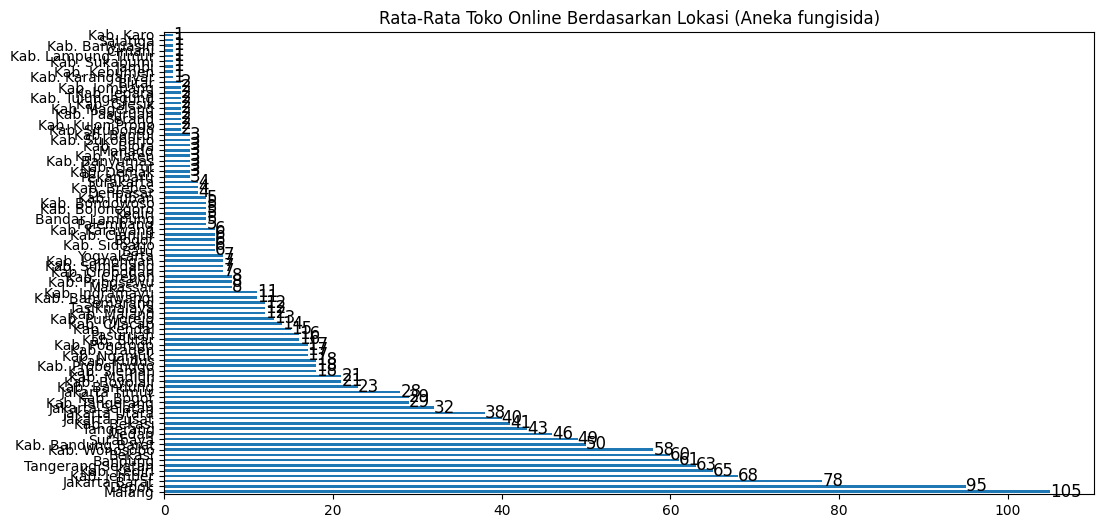

In [68]:
ax = df_fungisida['Lokasi'].value_counts() \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Toko Online Berdasarkan Lokasi (Aneka fungisida)')

plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize = 12)

plt.show()

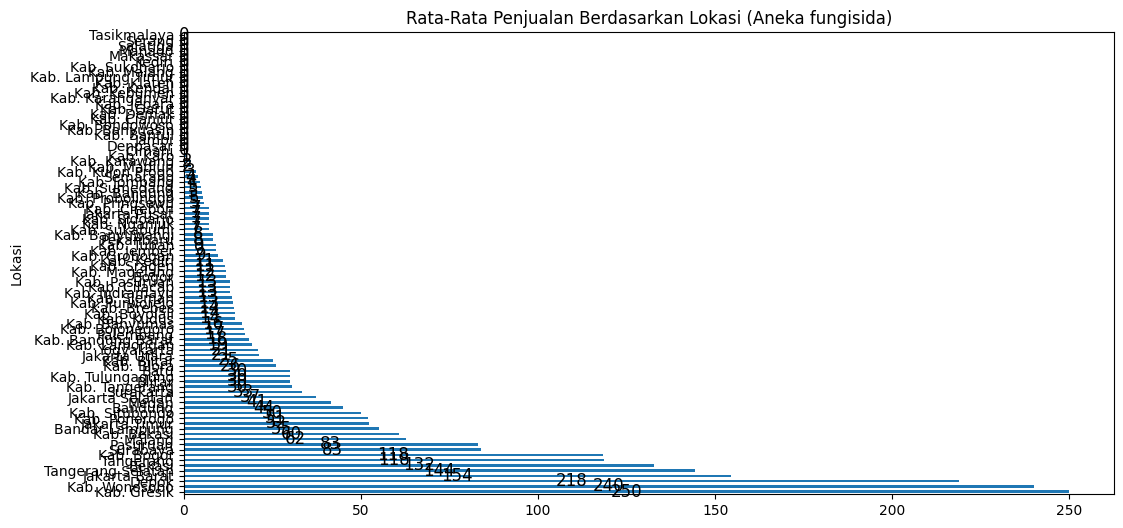

In [72]:
ax = df_fungisida.groupby('Lokasi')['Terjual_num1'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Penjualan Berdasarkan Lokasi (Aneka fungisida)')
ax.bar_label(ax.containers[0], label_type = 'center', fmt = '%d', fontsize=12)
plt.show()

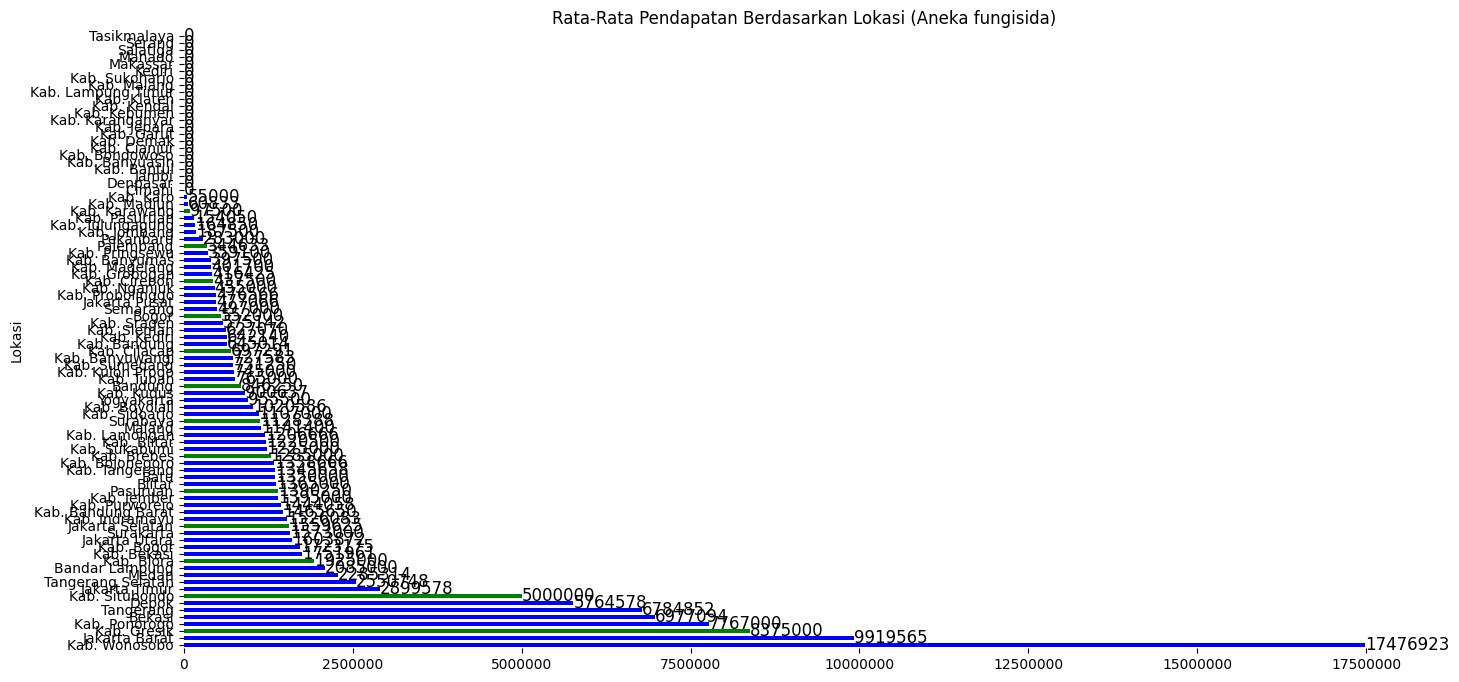

In [71]:
df_fungisida['Pendapatan'] = df_fungisida['Terjual_num1']*df_fungisida['Harga']
my_colors = list('bbgbb')

ax = df_fungisida.groupby('Lokasi')['Pendapatan'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (16,8), title='Rata-Rata Pendapatan Berdasarkan Lokasi (Aneka fungisida)', color=my_colors)
plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize=12)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

#rects = ax.patches

#labels = [f"label{i}" for i in range(len(rects))]


#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(
#        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
#    )

plt.show()

C:\Users\i_fes\AppData\Local\Temp\ipykernel_19484\2714344936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_fungisida.dropna().corr()


<Axes: >

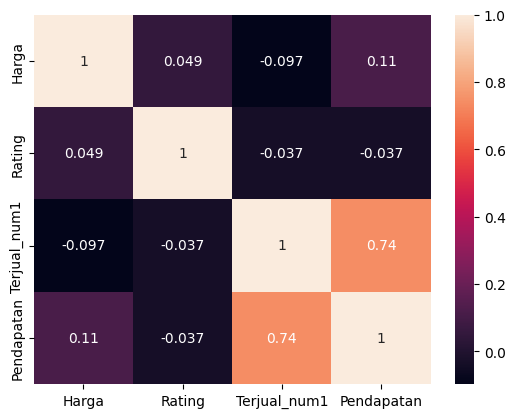

In [73]:
df_corr = df_fungisida.dropna().corr()
sns.heatmap(df_corr, annot = True)

In [75]:
#df_fungisida.to_excel('Tokped_Daging_API.xlsx', index=False)